In [1]:
pip install opencv-python

In [200]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [163]:
dir = 'C:\\Users\\Home\\Desktop\\Tasks\\ImageClassif\\PetImages\\PetImages'

In [164]:
categories= ['Cat', 'Dog']

data=[]

In [188]:
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            pet_img=cv2.imread(imgpath,0)
            try:
                pet_img=cv2.resize(pet_img,(50,50))
                image=np.array(pet_img).flatten()
                data.append([image,label])
            except Exception as e:
                pass

In [189]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [190]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [199]:
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
    features.append(feature)
    labels.append(label)



In [198]:
xtrain, xtest, ytrain,ytest= train_test_split(features, labels, test_size=0.01)



Accuracy is:  0.6613226452905812
Prediction is:  Dog


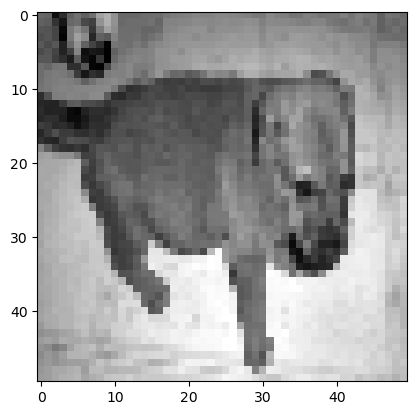

In [209]:
#model= SVC(C=1, kernel='poly', gamma='auto')
#model.fit(xtrain, ytrain)


pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()
prediction=model.predict(xtest)

accuracy=model.score(xtest,ytest)

categories=['Cat', 'Dog']

print('Accuracy is: ', accuracy)
print('Prediction is: ', categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet, cmap='gray')
plt.show()